# 探索影响泰坦尼克号乘客生还的因素
# 4.1提出问题
猜测的可能影响因素如下：
### 1、乘客所属社会阶级与生存率的关系
### 2、乘客年龄与生存率的关系
### 3、性别与生存率的关系

# 4.2 数据整理
### 1、读入数据及定义出后续数据分析会用到的公式

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#加载数据集
full_data = pd.read_csv('titanic-data.csv')
full_data.head()

def get_survival_rate_by_category(passengers,category):
    
    return passengers.groupby(category).mean()['Survived']

def passengers_count(data,category):
        return data.groupby(category)['PassengerId'].count()
        


### 2、检查数据中是否存在缺失字符段

In [2]:
full_data.info()   #查看是否有缺失字符段

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 3、处理缺失字段
（1）由于年龄中有缺失字符段，可选择去除年龄缺失的幸存人员数据或者将缺失字段进行填充，本次选择取已有年龄的平均值进行填充

（2）将年龄分为儿童，青年，壮年，老年四个类别，并添加到总的数据集中

In [3]:

mean_age = full_data['Age'].mean()
full_data['Age'].fillna(mean_age,inplace = True)

bins = [0,16,20,50,100]
group_names = ['Children','Adolescents','Adults','Old']

age_group = pd.cut(full_data['Age'],bins,labels = group_names)
full_data['age_group'] = age_group
full_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults


### 4、提取出总数据集中幸存人员信息

In [4]:

survived_data_df = full_data[full_data.Survived==1]
survived_count = len(survived_data_df)     #幸存人员总数
survived_data_df.head()   #check
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Children


# 4.3 数据分析
### 1、分析社会等级与幸存率的关系


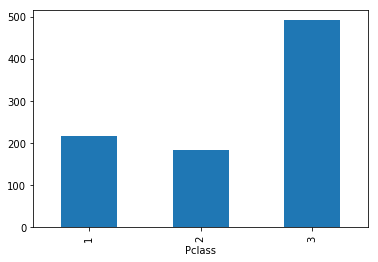

In [22]:
passengers_count(full_data,'Pclass').plot(kind='bar')
plt.xlabel = ('Pclass')
plt.ylabel = ('number of passengers')
plt.title = ('survival rate by Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


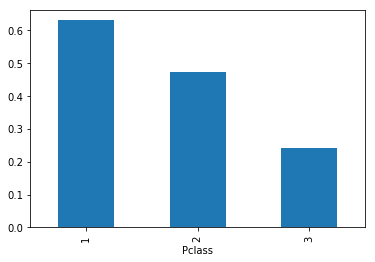

In [21]:
#计算幸存人员中各个等级人员所占比例
survival_rate_by_Pclass = get_survival_rate_by_category(full_data,'Pclass')
print survival_rate_by_Pclass
tx = [1,2,3]
#plt.bar(tx,survival_rate_by_Pclass,width = 0.35)

survival_rate_by_Pclass.plot(kind='bar')
plt.xlabel = ('Pclass')
plt.ylabel = ('survival rate')
plt.title = ('survival rate by Pclass')




Pclass
1    136
2     87
3    119
Name: PassengerId, dtype: int64


TypeError: 'str' object is not callable

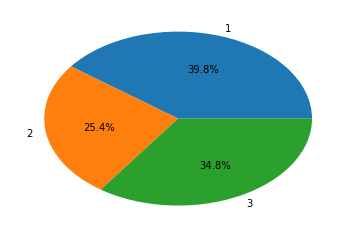

In [7]:
Pclass_proportion_of_suvived = passengers_count(survived_data_df,'Pclass')/ survived_count
print passengers_count(survived_data_df,'Pclass')
#根据幸存人员中各社会等级人数占总幸存人员的比例画出饼图
labels = ['1','2','3']
plt.pie(Pclass_proportion_of_suvived,labels=labels,autopct='%1.1f%%')
plt.title('Pclass of survived passengers')

从上一段直方图和饼图可以看出，社会级别1、2等人数较少，3等人数对多，而对应的幸存率分别为0.63、0.47和0.24；幸存者中1等占总幸存人数的0,40,2等占0.25，3等占0.35。可以得出的结论为社会等级越高则越有可能幸存。

### 2、分析年龄与幸存率的关系

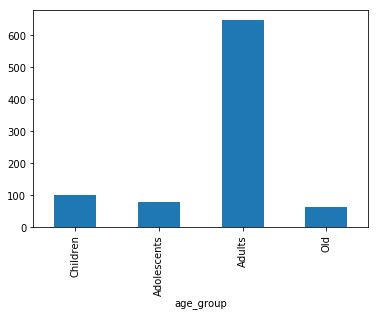

In [23]:
passengers_count(full_data,'age_group').plot(kind='bar')
plt.xlabel = ('age_group')
plt.ylabel = ('number of passengers')
plt.title = ('survival rate by age')

age_group
Children       0.550000
Adolescents    0.341772
Adults         0.367284
Old            0.343750
Name: Survived, dtype: float64


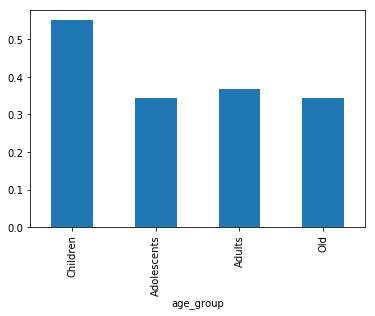

In [24]:

survival_rate_by_age = get_survival_rate_by_category(full_data,'age_group')
print survival_rate_by_age
xage = [1,2,3,4]
survival_rate_by_age.plot(kind = 'bar')
plt.ylabel = ('survival_rate')
plt.title = ('survival rate by age')


age_group
Children       0.160819
Adolescents    0.078947
Adults         0.695906
Old            0.064327
Name: PassengerId, dtype: float64


TypeError: 'str' object is not callable

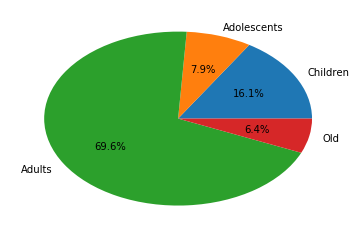

In [25]:

age_proportion_of_survived = passengers_count(survived_data_df,'age_group')/ survived_count
print age_proportion_of_survived
#根据幸存人员中各社会等级人数占总幸存人员的比例画出饼图
y = ['Children','Adolescents','Adults','Old']
plt.pie(age_proportion_of_survived,labels=y,autopct='%1.1f%%')
plt.title('age of survived passengers')

从以上直方图和饼图可以看出，在整体数据中，成年人最多，其次为儿童，青年人和老年人数量差不多。儿童的幸存率为0.16,青年的幸存率为0.08，成年人的幸存率为0.70，老年人的幸存率为0.06；幸存者中儿童占总幸存人数的0,16,青年占0.08，成年人占0.70，老年人占0.06。

### 3、分析性别与幸存率的关系

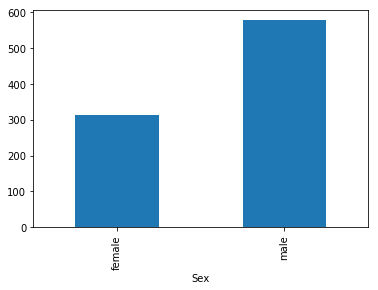

In [27]:
passengers_count(full_data,'Sex').plot(kind='bar')
plt.xlabel = ('sex')
plt.ylabel = ('number of passengers')
plt.title = ('survival rate by Sex')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


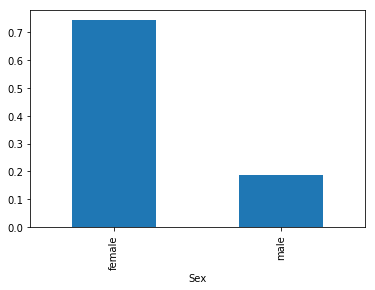

In [26]:
survival_rate_by_sex = get_survival_rate_by_category(full_data,'Sex')
print survival_rate_by_sex
survival_rate_by_sex.plot(kind = 'bar')
plt.ylabel = ('survival_rate')
plt.title = ('survival rate by sex')


In [ ]:

sex_proportion_of_survived = passengers_count(survived_data_df,'Sex')/ survived_count
print sex_proportion_of_survived
#根据幸存人员中各社会等级人数占总幸存人员的比例画出饼图
y = ['female','male']
plt.pie(sex_proportion_of_survived,labels=y,autopct='%1.1f%%')
plt.title('sex of survived passengers')

从以上直方图和饼图可以看出，男性人数远多于女性，但女性的幸存率为0.74,男性的幸存率为0.19；幸存者中女性占总幸存人数的0,68,男性占0.32。可以得出的结论为女性幸存率高于男性。

# 4.4结论
### 1、从上述三个对生存率有影响的因素的分析，可以认为社会等级越高，性别为女性的乘客有可能幸存；
### 2、对部分缺失年龄字符段的数据的处理（用已有年龄的平均值进行填充）可能会造成年龄对幸存率影响分析的误差；
### 3、其他未分析的因素，例如乘客在船上的兄弟姐妹和配偶的数量，乘客为船票支付的费用以及乘客所属船舱的编号等很可能也对生存率有影响；
### 4、在数据分析中并未使用统计检验，因此得到的结果可能是不够准确的。